In [1]:
# https://towardsdatascience.com/deep-inside-autoencoders-7e41f319999f
from keras import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from cifar import Cifar

Using TensorFlow backend.


In [2]:
cifar = Cifar("../datasets/cifar-10-batches-py")
cifar.load()

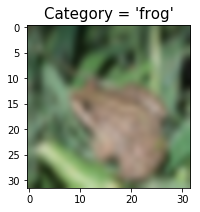

In [3]:
cifar.plot(4, train=False)

In [72]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=cifar.train_x.shape[1:]))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mse')

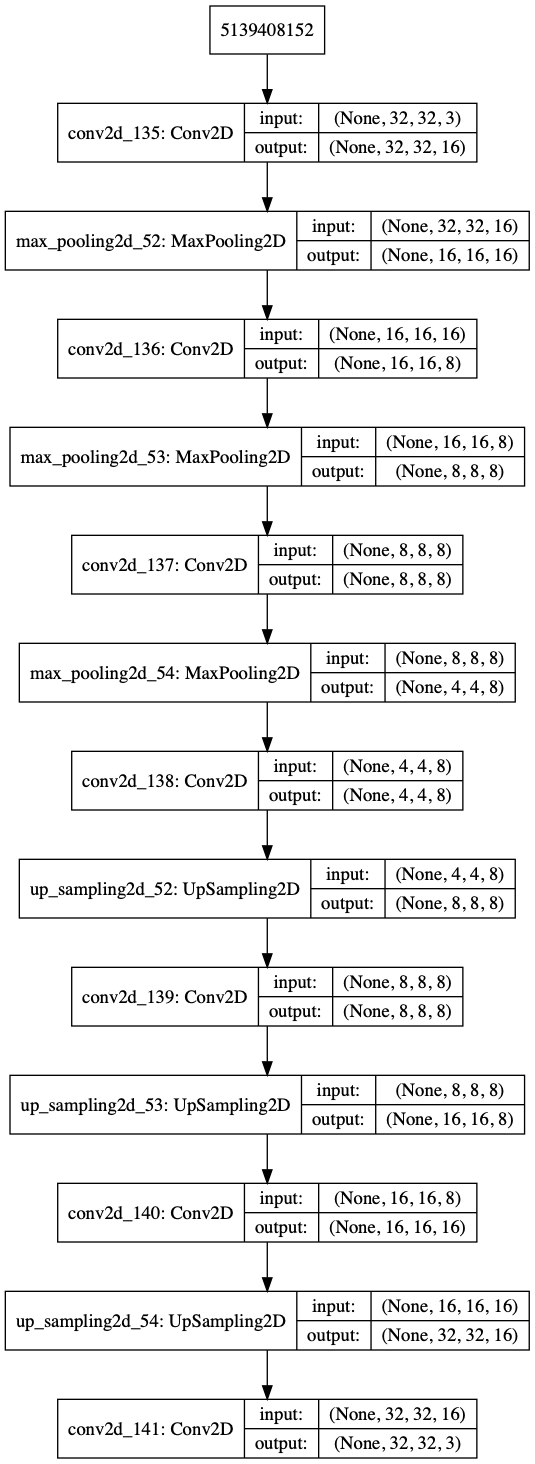

In [75]:
from keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file="keras_model.png", show_shapes=True)
Image("keras_model.png")

In [74]:
model.fit(cifar.train_x, cifar.train_x, batch_size=512, epochs=1)
model.save('conv_autoencoder.h5')

Epoch 1/1


  512/50000 [..............................] - ETA: 1:57 - loss: 0.0644

 1024/50000 [..............................] - ETA: 1:17 - loss: 0.0637

 1536/50000 [..............................] - ETA: 1:02 - loss: 0.0637

 2048/50000 [>.............................] - ETA: 55s - loss: 0.0640 

 2560/50000 [>.............................] - ETA: 50s - loss: 0.0641

 3072/50000 [>.............................] - ETA: 47s - loss: 0.0642

 3584/50000 [=>............................] - ETA: 45s - loss: 0.0640

 4096/50000 [=>............................] - ETA: 43s - loss: 0.0638

 4608/50000 [=>............................] - ETA: 41s - loss: 0.0641

 5120/50000 [==>...........................] - ETA: 40s - loss: 0.0641

 5632/50000 [==>...........................] - ETA: 39s - loss: 0.0639

 6144/50000 [==>...........................] - ETA: 38s - loss: 0.0638

 6656/50000 [==>...........................] - ETA: 37s - loss: 0.0638

 7168/50000 [===>..........................] - ETA: 36s - loss: 0.0637

 7680/50000 [===>..........................] - ETA: 35s - loss: 0.0634

 8192/50000 [===>..........................] - ETA: 35s - loss: 0.0634

 8704/50000 [====>.........................] - ETA: 34s - loss: 0.0633

 9216/50000 [====>.........................] - ETA: 33s - loss: 0.0630

 9728/50000 [====>.........................] - ETA: 33s - loss: 0.0630

10240/50000 [=====>........................] - ETA: 32s - loss: 0.0627

10752/50000 [=====>........................] - ETA: 31s - loss: 0.0625

11264/50000 [=====>........................] - ETA: 31s - loss: 0.0623

11776/50000 [======>.......................] - ETA: 30s - loss: 0.0622

12288/50000 [======>.......................] - ETA: 30s - loss: 0.0619

12800/50000 [======>.......................] - ETA: 29s - loss: 0.0617

13312/50000 [======>.......................] - ETA: 29s - loss: 0.0614

13824/50000 [=======>......................] - ETA: 29s - loss: 0.0611

14336/50000 [=======>......................] - ETA: 28s - loss: 0.0607

KeyboardInterrupt: 

In [69]:
res = model.predict(cifar.train_x[0:10])

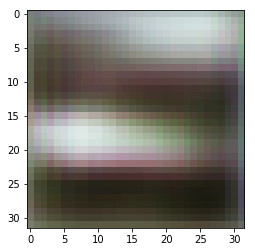

In [70]:
plt.imshow(res[4])
plt.show()

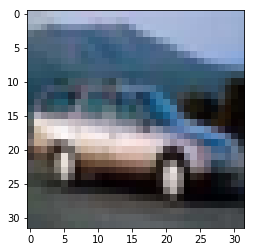

In [71]:
plt.imshow(cifar.train_x[4])
plt.show()